<a href="https://colab.research.google.com/github/ainatersol/LanguageAPI/blob/huggingface/Huggingface.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install huggingface_hub
!pip install transformers datasets

In [ ]:
import huggingface_hub
import transformers

from transformers import pipeline 

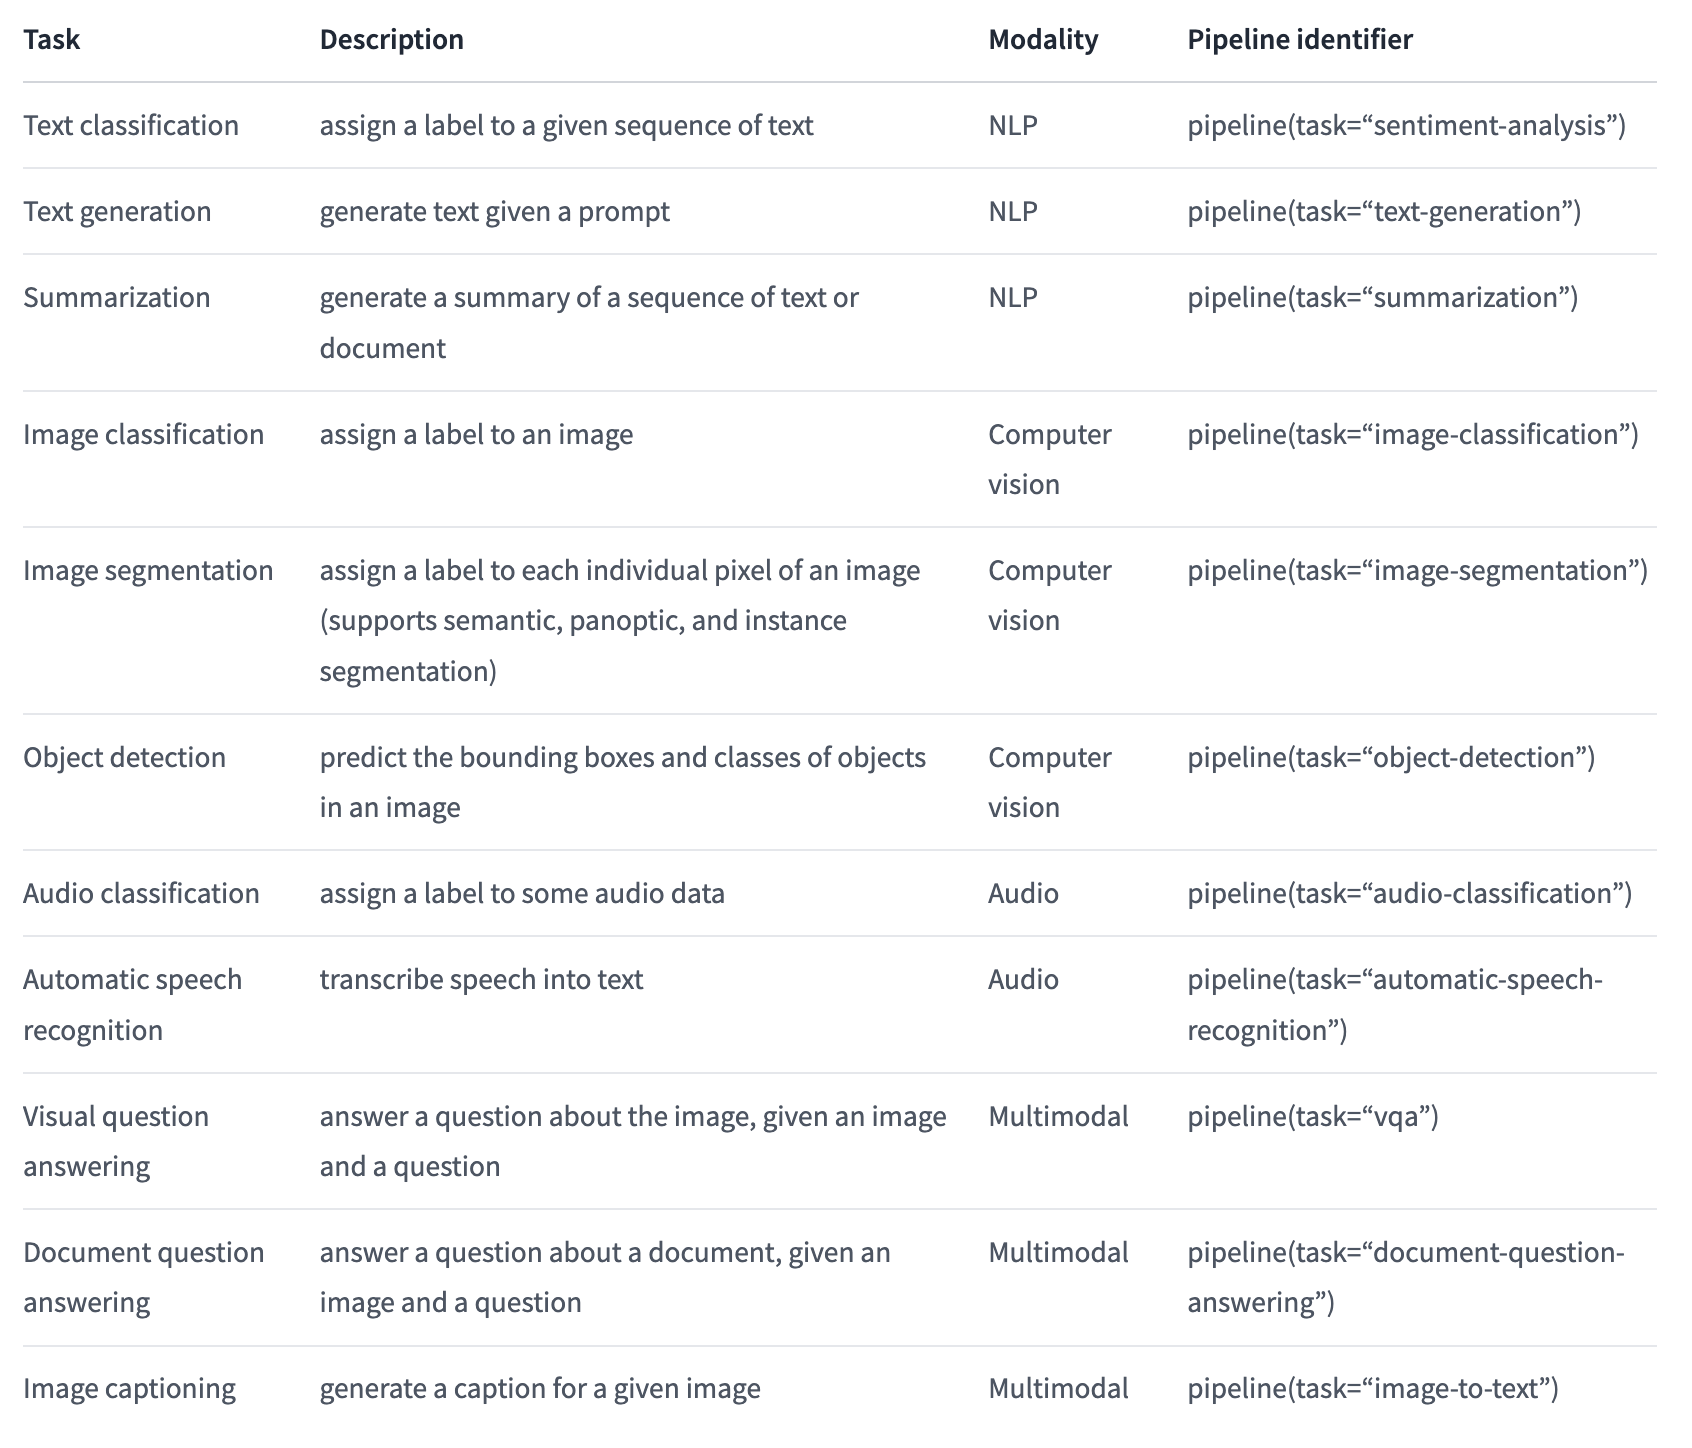

# Sentiment Analysis - Classification

In [ ]:
sentiment = pipeline(task="sentiment-analysis")

In [ ]:
prompts = ['I am happy', 'I am upset']
sentiment(prompts)

# Classification

# Generate 

In [ ]:
generation = pipeline(task="text-generation")

In [ ]:
prompt = """
Write a 2-paragraph essay about the types of books you should be reading if you want to work in AI.

Essay:
"""

generation(prompt, max_length=200)

# Summarize

In [ ]:
summarization = pipeline(task="summarization")

In [ ]:
prompt = """
In the early 20th century, a group of French artists and writers formed a movement known as surrealism. Surrealism was characterized by its rejection of rationalism and its embrace of the irrational and the subconscious. Surrealist artists and writers sought to tap into the deeper realms of the mind in order to explore the hidden desires, fears, and impulses that underlie human consciousness.

The surrealist movement had a profound impact on the art and literature of the 20th century, influencing everything from abstract expressionism to science fiction. However, it was also controversial, with some critics accusing surrealist artists of being too focused on shock value and sensationalism.

Despite its controversies, surrealism remains an important artistic and cultural movement, inspiring generations of artists and writers to push the boundaries of what is possible in art and literature. From the surreal dreamscapes of Salvador Dali to the experimental poetry of Andre Breton, surrealism continues to captivate and challenge audiences with its innovative and provocative approach to art.
"""

summarization(prompt)

# Question Answering

In [ ]:

oracle = pipeline(
    "question-answering", model="distilbert-base-cased-distilled-squad", tokenizer="bert-base-cased"
)

# Embed

# Visual Question Answering 

In [ ]:
import torch

In [ ]:
from transformers import AutoProcessor, AutoModelForCausalLM
from huggingface_hub import hf_hub_download
from PIL import Image
import matplotlib.pyplot as plt 

processor = AutoProcessor.from_pretrained("microsoft/git-base-textvqa")
model = AutoModelForCausalLM.from_pretrained("microsoft/git-base-textvqa")

#file_path = hf_hub_download(repo_id="nielsr/textvqa-sample", filename="bus.png", repo_type="dataset")
file_path = '/content/ILSVRC2012_test_00000005.JPEG'
image = Image.open(file_path).convert("RGB")
plt.imshow(image)

In [ ]:
pixel_values = processor(images=image, return_tensors="pt").pixel_values

question = "what is next to the TV?"

input_ids = processor(text=question, add_special_tokens=False).input_ids
input_ids = [processor.tokenizer.cls_token_id] + input_ids
input_ids = torch.tensor(input_ids).unsqueeze(0)

generated_ids = model.generate(pixel_values=pixel_values, input_ids=input_ids, max_length=50)
print(processor.batch_decode(generated_ids, skip_special_tokens=True))